**Simon's Algorithm**

**Problem Statement**  
Simon's problem is to determine a secret string $s$ of length $n$ from a function $f: \{0,1\}^n \to \{0,1\}^n$ with the property that:

- $f(x) = f(x \oplus s)$ for all $x \in \{0,1\}^n$.
- For different $x$ and $y$, $f(x) \neq f(y)$ if $x \neq y$ and $x \oplus s \neq y \oplus s$.

The goal is to find the string $s$ using fewer function evaluations than a classical algorithm would require.

**Classical Approach**  
In a classical setting, finding $s$ would require evaluating the function on multiple inputs and solving a system of linear equations. On average, classical algorithms would need about $2^{n-1}$ function evaluations to find $s$, which is exponential in $n$.

**Quantum Approach: Simon's Algorithm**

**1. Initialization**

We start with two registers, each initialized to \( n \) qubits in the state \( |0\rangle \). The initial state is:

$$
|0\rangle^{\otimes n} \otimes |0\rangle^{\otimes n}
$$

**2. Apply Hadamard Gates to the First Register**

Apply Hadamard gates $H^{\otimes n}$ to the first register:

$$
H^{\otimes n} |0\rangle^{\otimes n} = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} |x\rangle
$$

The state of the system after applying Hadamard gates to the first register is:

$$
\frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} |x\rangle \otimes |0\rangle^{\otimes n}
$$

**3. Apply the Function \( U_f \)**

The function $f$ is encoded in a quantum oracle $U_f$ that acts as:

$$
U_f |x\rangle |y\rangle = |x\rangle |y \oplus f(x)\rangle
$$

Apply $U_f$ to the state:

$$
U_f \left( \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} |x\rangle \otimes |0\rangle^{\otimes n} \right) = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} |x\rangle \otimes |f(x)\rangle
$$

**4. Apply Hadamard Gates to the First Register Again**

Apply Hadamard gates $H^{\otimes n}$ to the first register again:

$$
H^{\otimes n} \left( \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n-1} |x\rangle \right) \otimes |f(x)\rangle
$$

The result is:

$$
\frac{1}{2^n} \sum_{z=0}^{2^n-1} \left( \sum_{x=0}^{2^n-1} (-1)^{x \cdot z} |x\rangle \right) \otimes |f(x)\rangle
$$

Here, $x \cdot z$ denotes the dot product of $x$ and $z$.

**5. Measure the First Register**

Measure the first register. The measurement collapses the state to:

$$
\frac{1}{\sqrt{|\mathcal{S}|}} \sum_{x \in \mathcal{S}} |x\rangle
$$

where $\mathcal{S}$ is the set of solutions to the equation $f(x) = f(x \oplus s)$.

**6. Solve for $s$**

With the result of the measurement, solve for the string $s$ by solving a system of linear equations. The solutions to these equations give you the value of $s$.

**Intuition**

**Superposition**

The first set of Hadamard gates places the qubits into a superposition of all possible states. This allows the quantum computer to evaluate the function $f(x)$ simultaneously for all possible values of $x$.

**Oracle Function**

The oracle $U_f$ encodes the function $f$ and introduces a dependency between the states of the two registers. After applying the oracle, the second register contains information about $f(x)$.

**Hadamard Gates and Interference**

Applying Hadamard gates again to the first register creates interference patterns in the amplitudes. When you measure the first register, the result reflects a solution to the system of equations determined by $f(x) = f(x \oplus s)$.

**Linear Equations**

The outcomes of the measurement correspond to linear combinations of the states in the first register. Solving these linear combinations reveals the value of $s$. Since the quantum algorithm extracts the information about $s$ efficiently, it reduces the number of queries needed compared to a classical algorithm.

**Efficiency**

Simon's Algorithm provides an exponential speedup over classical algorithms by finding $s$ in polynomial time with respect to the number of qubits, using a number of evaluations that is linear in the size of $s$.

**Summary**

Simon's Algorithm is a quantum algorithm that solves a specific type of problem exponentially faster than the best-known classical algorithms. By leveraging quantum superposition, the oracle function, and interference, Simon’s Algorithm can efficiently determine the hidden string $s$ with significantly fewer evaluations.


In [1]:
from qiskit import QuantumCircuit

n = 4
circuit = QuantumCircuit(2*n, n)

# apply hadamard to input qubits
circuit.h(range(n))

# apply hadamard to output qubits
circuit.h(range(n, 2*n))

# TODO implement oracle
oracle = QuantumCircuit(2*n)
oracle.cx(range(n), range(n, 2*n))  # Controlled-NOT gates to encode the function
circuit.append(oracle, range(2*n))

# apply hadamard to input qubits
circuit.h(range(n))
circuit.measure(range(n), range(n))

circuit.draw()


┌───┐┌──────────────┐┌───┐┌─┐         
q_0: ┤ H ├┤0             ├┤ H ├┤M├─────────
     ├───┤│              │├───┤└╥┘┌─┐      
q_1: ┤ H ├┤1             ├┤ H ├─╫─┤M├──────
     ├───┤│              │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├┤2             ├┤ H ├─╫──╫─┤M├───
     ├───┤│              │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤3             ├┤ H ├─╫──╫──╫─┤M├
     ├───┤│  circuit-161 │└───┘ ║  ║  ║ └╥┘
q_4: ┤ H ├┤4             ├──────╫──╫──╫──╫─
     ├───┤│              │      ║  ║  ║  ║ 
q_5: ┤ H ├┤5             ├──────╫──╫──╫──╫─
     ├───┤│              │      ║  ║  ║  ║ 
q_6: ┤ H ├┤6             ├──────╫──╫──╫──╫─
     ├───┤│              │      ║  ║  ║  ║ 
q_7: ┤ H ├┤7             ├──────╫──╫──╫──╫─
     └───┘└──────────────┘      ║  ║  ║  ║ 
c: 4/═══════════════════════════╩══╩══╩══╩═
                                0  1  2  3

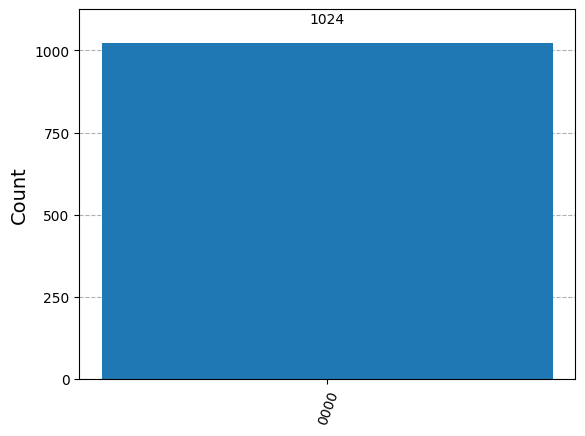

In [2]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

simulator = AerSimulator()

compiled_circuit = transpile(circuit, simulator)

res = simulator.run(compiled_circuit).result()
counts = res.get_counts()

plot_histogram(counts)